In [1]:
import os
import numpy as np
import json
import matplotlib.pyplot as plt
import mdtraj
import urllib.request

# Download link
def download_link(doi, file):
    if "zenodo" in doi.lower():
        zenodo_entry_number = doi.split(".")[2]
        return 'https://zenodo.org/record/' + zenodo_entry_number + '/files/' + file
    else:
        print ("DOI provided: {0}".format(doi))
        print ("Repository not validated. Please upload the data for example to zenodo.org")
        return ""

POPS_T298K
POPE_310K
POPC_T303K
POPS_T298K
POPG_T298K


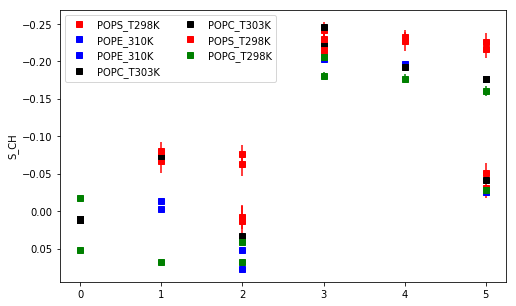

In [18]:
import seaborn as snscolors = {'POPC' :'black','POPS':'red','POPE':'blue','POPG':'green'}
#lipids = {'POPC','POPS','POPE','POPG'}
lipids = {'POPE','POPG','POPS','POPC'}

fig= plt.figure(figsize=(8,5))
for subdir, dirs, files in os.walk(r'/home/samuli/work/NMRlipids/NMRlipidsIVPEandPG/Data/Simulations/'):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith(".md"):
            dict = eval(open(filepath).read())
            for lipid in lipids:
                if lipid in dict.get('SYSTEM'):
                    OPfilepath = subdir + '/OrderParameters.json'
                    print (dict.get('SYSTEM'))
                    with open(OPfilepath) as json_file:
                        data = json.load(json_file)
                    for key,value in data.items():
                        #print (key,value[0][0],value[0][2])
                        plt.gca().invert_yaxis()
                        plt.ylabel('S_CH')
                        if 'gamma' in key:
                            plt.plot(0,value[0][0],"s",color=colors[lipid])
                            plt.errorbar(0,value[0][0],yerr=value[0][2],color=colors[lipid])
                        if 'beta' in key:
                            plt.plot(1,value[0][0],"s",color=colors[lipid],label=dict.get('SYSTEM'))
                            plt.errorbar(1,value[0][0],yerr=value[0][2],color=colors[lipid])
                        if 'alpha' in key:
                            plt.plot(2,value[0][0],"s",color=colors[lipid])
                            plt.errorbar(2,value[0][0],yerr=value[0][2],color=colors[lipid])
                        if 'g3' in key:
                            plt.plot(3,value[0][0],"s",color=colors[lipid])
                            plt.errorbar(3,value[0][0],yerr=value[0][2],color=colors[lipid])
                        if 'g2' in key:
                            plt.plot(4,value[0][0],"s",color=colors[lipid])
                            plt.errorbar(4,value[0][0],yerr=value[0][2],color=colors[lipid])
                        if 'g1' in key:
                            plt.plot(5,value[0][0],"s",color=colors[lipid])
                            plt.errorbar(5,value[0][0],yerr=value[0][2],color=colors[lipid])
plt.legend(loc='best',ncol=2)
plt.savefig('/home/samuli/work/NMRlipids/NMRlipidsIVPEandPG/Figs/CHARMMfromLIPIDS.eps')
                    

SyntaxError: unexpected EOF while parsing (<ipython-input-24-b2c0b257f12d>, line 18)

In [2]:
colors = {'POPC' :'black','POPS':'red','POPE':'blue','POPG':'green'}
#lipids = {'POPC','POPS','POPE','POPG'}
#lipids = {'POPE','POPG','POPS','POPC'}
lipids ={'POPE'}

fig= plt.figure(figsize=(8,5))
for subdir, dirs, files in os.walk(r'/home/samuli/work/NMRlipids/NMRlipidsIVPEandPG/Data/Simulations/'):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith(".md"):
            dict = eval(open(filepath).read())
            for lipid in lipids:
                if lipid in dict.get('SYSTEM'):
                    doi = dict.get('DOI')
                    trj = dict.get('TRJ')
                    tpr = dict.get('TPR')
                    trj_url = download_link(doi, trj[0][0])
                    tpr_url = download_link(doi, tpr[0][0])
                    trj_name = '/media/samuli/TOSHIBA/DataBank/TST/NMRlipidsIVbTST/'+dict.get('TRJ')[0][0]
                    tpr_name = '/media/samuli/TOSHIBA/DataBank/TST/NMRlipidsIVbTST/'+dict.get('TPR')[0][0]
                    gro_name = '/media/samuli/TOSHIBA/DataBank/TST/NMRlipidsIVbTST/conf.gro'
                    #response = urllib.request.urlretrieve(trj_url, trj_name)
                    #response = urllib.request.urlretrieve(tpr_url, tpr_name)
                    !echo System | gmx trjconv -f {trj_name} -s {tpr_name} -dump 0 -o {gro_name}
                    traj = mdtraj.load(trj_name, top = gro_name)
                    dihs = traj.topology.select("name == P or name == C11 or name == C12 or name == N")
                    index = [ [] for i in range(traj.topology.n_residues)]
                    #dihRESULT = [ [] for i in range(traj.topology.n_residues)]
                    dihRESULT = []
                    for residue in traj.topology.residues:
                        for i in dihs:
                            if(traj.topology.atom(i).residue == residue): 
                                index[residue.index].append(traj.topology.atom(i).index)
                        if(len(index[residue.index]) > 0):
                            #dihRESULT[residue.index].append(mdtraj.compute_dihedrals(traj,[index[residue.index]]))
                            dihRESULT.append(mdtraj.compute_dihedrals(traj,[index[residue.index]]))
                    print(dihRESULT)

                  :-) GROMACS - gmx trjconv, VERSION 5.1.2 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov  Herman J.C. Berendsen    Par Bjelkmar   
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra   Sebastian Fritsch 
  Gerrit Groenhof   Christoph Junghans   Anca Hamuraru    Vincent Hindriksen
 Dimitrios Karkoulis    Peter Kasson        Jiri Kraus      Carsten Kutzner  
    Per Larsson      Justin A. Lemkul   Magnus Lundborg   Pieter Meulenhoff 
   Erik Marklund      Teemu Murtola       Szilard Pall       Sander Pronk   
   Roland Schulz     Alexey Shvetsov     Michael Shirts     Alfons Sijbers  
   Peter Tieleman    Teemu Virolainen  Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2015, The GROMACS development team at
Uppsala Universit

<Figure size 576x360 with 0 Axes>

In [21]:
dihRESULTall = []
#dihRESULTsum=np.add(dihRESULT[5],dihRESULT[5]*-1)
#sum=0ihRESULTsum=np.add(dihRESULTsum,dihRESULT[i])
#print(dihRESULTsum)
#dihRESULTsum=np.add(dihRESULTsum,dihRESULT[9])
#print(dihRESULTsum)
#dihRESULTsum=np.add(dihRESULTsum,dihRESULT[10])
for i in range(traj.topology.n_residues):
    if(len(dihRESULT[i]) > 0):
        dihRESULTall=dihRESULT[0] + dihRESULT[i]
print(dihRESULTall)



[[-2.3963168]
 [-1.9382496]
 [-1.2479004]
 ...
 [-2.7386937]
 [-2.8672223]
 [ 2.3542624]]


In [8]:
print(len(dihRESULT))
#print(dihRESULT[1])

144


[ 31.  26.  29.  37.  29.  15.   9.   7.   5.  29. 102. 205. 321. 339.
 285. 189. 160. 171. 181. 181. 162.  86.  31.  13.   9.   6.  19.  46.
  91. 134. 163. 189. 151. 153. 182. 218. 248. 268. 193.  75.  22.  11.
   5.   6.  13.  35.  34.  19.  37.  31.]
[ 31.  26.  29.  37.  29.  15.   9.   7.   5.  29. 102. 205. 321. 339.
 285. 189. 160. 171. 181. 181. 162.  86.  31.  13.   9.   6.  19.  46.
  91. 134. 163. 189. 151. 153. 182. 218. 248. 268. 193.  75.  22.  11.
   5.   6.  13.  35.  34.  19.  37.  31.]
[ 12.  26.  27.  27.  23.  12.  10.   8.   8.  36.  82. 190. 291. 278.
 249. 187. 145. 162. 161. 127. 123.  61.  35.  17.   6.   7.  13.  39.
  78. 139. 186. 189. 197. 191. 229. 254. 325. 332. 248.  97.  38.   7.
   5.  10.  16.  20.  21.  26.  14.  17.]
[ 43.  52.  56.  64.  52.  27.  19.  15.  13.  65. 184. 395. 612. 617.
 534. 376. 305. 333. 342. 308. 285. 147.  66.  30.  15.  13.  32.  85.
 169. 273. 349. 378. 348. 344. 411. 472. 573. 600. 441. 172.  60.  18.
  10.  16.  29.  55.  

[ 22.  13.  28.  23.  19.  23.  10.   4.   9.  22.  72. 181. 289. 297.
 250. 207. 198. 197. 207. 195. 135.  73.  32.  18.  10.   4.  11.  37.
  71. 107. 149. 193. 166. 178. 219. 262. 324. 284. 182.  96.  27.   7.
   8.  10.  13.  27.  28.  24.  19.  21.]
[ 423.  455.  624.  687.  556.  358.  184.  103.  187.  641. 1771. 4017.
 6111. 6352. 5215. 4251. 3807. 3804. 3819. 3597. 2809. 1705.  777.  322.
  132.  160.  312.  818. 1637. 2762. 3590. 3847. 3658. 3686. 4140. 5222.
 6393. 6122. 4072. 1849.  629.  171.  104.  173.  307.  565.  623.  589.
  477.  408.]
[ 20.  27.  39.  44.  30.  30.  16.  11.   7.  32.  86. 201. 290. 283.
 218. 194. 167. 171. 183. 160. 120.  77.  31.  18.   5.  10.  19.  42.
  88. 147. 184. 195. 154. 186. 206. 241. 293. 291. 180.  74.  32.  15.
   8.  15.  18.  25.  35.  39.  25.  19.]
[ 443.  482.  663.  731.  586.  388.  200.  114.  194.  673. 1857. 4218.
 6401. 6635. 5433. 4445. 3974. 3975. 4002. 3757. 2929. 1782.  808.  340.
  137.  170.  331.  860. 1725. 2909. 3

[ 14.  24.  28.  32.  27.  13.  13.   3.   6.  37.  94. 194. 305. 301.
 252. 217. 173. 172. 182. 151. 107.  80.  42.  14.   5.   4.  17.  39.
  82. 116. 170. 179. 172. 167. 207. 224. 333. 322. 197.  93.  27.  11.
   7.   9.  15.  29.  32.  29.  19.  15.]
[  670.   812.  1043.  1183.   970.   628.   329.   155.   310.  1072.
  3066.  6788. 10375. 10859.  8887.  7350.  6528.  6498.  6596.  6134.
  4834.  2925.  1337.   585.   239.   267.   533.  1416.  2956.  4765.
  6135.  6567.  6327.  6359.  7140.  8752. 10938. 10499.  6979.  3244.
  1078.   326.   179.   281.   544.   938.  1086.  1054.   810.   690.]
[ 18.  31.  36.  40.  25.  22.   7.   4.  11.  28.  88. 159. 272. 287.
 216. 214. 175. 171. 174. 223. 128.  73.  41.  17.   7.   6.  20.  32.
  92. 131. 189. 200. 164. 144. 193. 252. 317. 299. 201.  83.  34.  14.
   6.   8.  18.  34.  28.  31.  21.  17.]
[  688.   843.  1079.  1223.   995.   650.   336.   159.   321.  1100.
  3154.  6947. 10647. 11146.  9103.  7564.  6703.  6669.  6770.

[ 22.  35.  41.  29.  36.  13.  10.   7.  10.  25.  87. 186. 290. 291.
 248. 204. 177. 171. 180. 194. 111.  88.  41.  11.   6.   8.  15.  43.
  92. 143. 188. 173. 177. 185. 187. 239. 296. 259. 187.  65.  19.   6.
   6.  11.  17.  30.  47.  43.  22.  30.]
[  954.  1177.  1553.  1673.  1379.   881.   461.   230.   424.  1476.
  4294.  9583. 14660. 15297. 12486. 10290.  9185.  9178.  9311.  8697.
  6844.  4152.  1895.   835.   340.   372.   759.  1994.  4155.  6756.
  8680.  9296.  8898.  8936. 10102. 12580. 15654. 15010.  9915.  4606.
  1561.   489.   248.   403.   786.  1357.  1575.  1505.  1158.  1001.]
[ 20.  26.  35.  41.  27.  23.   9.   6.   4.  33.  72. 195. 320. 285.
 221. 183. 182. 189. 206. 156. 136.  80.  38.   9.  11.  13.  19.  32.
  91. 129. 166. 187. 169. 183. 197. 269. 289. 297. 190.  77.  16.   2.
   6.   6.  24.  25.  36.  21.  25.  25.]
[  974.  1203.  1588.  1714.  1406.   904.   470.   236.   428.  1509.
  4366.  9778. 14980. 15582. 12707. 10473.  9367.  9367.  9517.

[ 18.  31.  25.  30.  18.   6.   6.   8.   8.  24.  69. 162. 250. 295.
 236. 179. 198. 164. 130. 134. 122.  67.  26.  10.   3.   8.  13.  45.
  94. 166. 182. 203. 168. 211. 228. 248. 348. 325. 216. 100.  32.  12.
   4.   9.  16.  39.  32.  34.  22.  27.]
[ 1230.  1521.  1985.  2156.  1748.  1117.   565.   295.   553.  1907.
  5596. 12416. 18988. 19921. 16082. 13193. 11954. 11903. 12001. 11219.
  8846.  5347.  2448.  1048.   435.   495.  1012.  2593.  5436.  8736.
 11220. 12097. 11459. 11695. 13145. 16340. 20154. 19497. 12769.  5948.
  2022.   629.   317.   514.  1008.  1756.  2014.  1932.  1487.  1317.]
[ 15.  24.  34.  41.  38.  27.  11.  10.  12.  23.  72. 157. 273. 244.
 217. 182. 169. 164. 181. 187. 156.  81.  46.  19.   6.   5.  15.  30.
  88. 117. 153. 175. 189. 192. 191. 273. 321. 343. 227.  86.  33.   9.
   4.  10.  14.  29.  35.  29.  21.  23.]
[ 1245.  1545.  2019.  2197.  1786.  1144.   576.   305.   565.  1930.
  5668. 12573. 19261. 20165. 16299. 13375. 12123. 12067. 12182.

[ 37.  23.  30.  29.  30.  19.   7.   5.   7.  39. 100. 188. 296. 296.
 208. 203. 190. 196. 170. 171. 132.  77.  42.  17.   9.   8.  20.  39.
  91. 139. 164. 191. 163. 161. 208. 223. 312. 297. 166.  97.  27.   9.
   3.   9.  15.  26.  38.  28.  26.  20.]
[ 1523.  1871.  2402.  2605.  2168.  1374.   695.   376.   689.  2287.
  6766. 15050. 22953. 24052. 19498. 15903. 14556. 14538. 14514. 13585.
 10742.  6445.  2988.  1268.   519.   582.  1231.  3153.  6496. 10511.
 13489. 14637. 13938. 14147. 15892. 19786. 24507. 23684. 15425.  7199.
  2438.   765.   384.   628.  1256.  2146.  2498.  2401.  1891.  1629.]
[ 13.  20.  22.  29.  24.   8.   8.   8.  10.  34.  69. 180. 309. 282.
 257. 169. 195. 163. 171. 158. 134.  78.  23.  13.   6.   5.  17.  52.
  80. 140. 201. 192. 172. 180. 167. 251. 328. 315. 214. 103.  30.  21.
   8.   5.  15.  26.  27.  25.  27.  17.]
[ 1536.  1891.  2424.  2634.  2192.  1382.   703.   384.   699.  2321.
  6835. 15230. 23262. 24334. 19755. 16072. 14751. 14701. 14685.

[ 10.  17.  23.  28.  21.   8.   6.   4.   8.  31.  81. 167. 281. 324.
 267. 196. 203. 188. 172. 187. 131.  80.  43.  19.   6.   7.  19.  25.
  54.  99. 149. 168. 191. 170. 183. 249. 324. 322. 226. 108.  41.  11.
  12.   9.  13.  24.  30.  22.  27.  17.]
[ 1798.  2167.  2792.  3037.  2498.  1574.   818.   438.   815.  2742.
  7919. 17611. 26969. 28190. 23024. 18709. 17176. 17125. 17130. 16020.
 12593.  7638.  3506.  1494.   600.   672.  1456.  3708.  7577. 12269.
 15816. 17131. 16487. 16666. 18625. 23289. 28772. 27798. 18210.  8537.
  2848.   898.   462.   711.  1455.  2492.  2929.  2807.  2211.  1885.]
[ 14.  30.  33.  30.  38.  14.   9.   4.   7.  28.  72. 160. 294. 290.
 238. 230. 207. 197. 187. 182. 131.  82.  36.  12.   6.   6.  10.  39.
  64. 120. 145. 180. 167. 180. 197. 234. 342. 322. 177.  91.  42.   6.
   4.   7.  19.  30.  29.  25.  12.  22.]
[ 1812.  2197.  2825.  3067.  2536.  1588.   827.   442.   822.  2770.
  7991. 17771. 27263. 28480. 23262. 18939. 17383. 17322. 17317.

[ 15.  20.  23.  36.  27.  20.   9.   2.   8.  22.  78. 196. 296. 239.
 230. 190. 179. 190. 156. 160. 130.  86.  32.  11.   5.  11.  12.  30.
  84. 130. 169. 212. 201. 177. 192. 277. 297. 333. 200. 101.  29.  12.
   5.   6.  22.  32.  43.  33.  21.  12.]
[ 2067.  2523.  3249.  3499.  2917.  1815.   950.   497.   933.  3147.
  9093. 20253. 30979. 32354. 26508. 21547. 19644. 19634. 19678. 18397.
 14412.  8745.  4021.  1689.   685.   777.  1690.  4244.  8682. 14129.
 18237. 19626. 18916. 19133. 21434. 26679. 33086. 31964. 20877.  9864.
  3263.  1020.   532.   821.  1712.  2857.  3385.  3220.  2544.  2180.]
[ 24.  30.  32.  34.  24.  16.   1.   6.  12.  28.  88. 161. 250. 288.
 229. 180. 211. 215. 197. 167. 138.  76.  42.  12.   6.   9.  13.  28.
  72. 128. 159. 167. 193. 210. 209. 247. 304. 280. 198.  84.  30.   7.
   6.   4.  34.  36.  41.  32.  25.  18.]
[ 2091.  2553.  3281.  3533.  2941.  1831.   951.   503.   945.  3175.
  9181. 20414. 31229. 32642. 26737. 21727. 19855. 19849. 19875.

[ 18.  19.  38.  37.  26.  15.   6.   7.   8.  40. 104. 212. 283. 279.
 250. 214. 170. 190. 181. 173. 123.  82.  34.  11.   6.   5.  20.  38.
  72. 115. 162. 168. 156. 197. 202. 276. 322. 281. 159. 103.  37.  13.
   8.   8.  11.  17.  27.  30.  23.  25.]
[ 2334.  2840.  3677.  3969.  3293.  2055.  1064.   559.  1055.  3542.
 10337. 22900. 34970. 36512. 29858. 24306. 22239. 22317. 22325. 20901.
 16344.  9908.  4532.  1915.   774.   872.  1919.  4823.  9802. 15919.
 20543. 22068. 21342. 21679. 24148. 30059. 37306. 36080. 23636. 11150.
  3671.  1149.   592.   919.  1938.  3219.  3828.  3626.  2880.  2428.]
[ 16.  20.  24.  33.  28.  20.  13.   4.   6.  25.  89. 198. 269. 342.
 257. 210. 181. 178. 185. 142. 142.  84.  32.  15.   7.   2.  19.  31.
  65. 135. 162. 179. 180. 179. 194. 229. 295. 289. 202. 103.  38.   8.
   4.  10.  22.  30.  33.  25.  26.  21.]
[ 2350.  2860.  3701.  4002.  3321.  2075.  1077.   563.  1061.  3567.
 10426. 23098. 35239. 36854. 30115. 24516. 22420. 22495. 22510.

[ 16.  21.  24.  41.  27.  14.   4.   7.   7.  22.  97. 191. 276. 306.
 232. 181. 159. 185. 155. 162. 133.  67.  34.  16.   9.   5.  19.  45.
  87. 113. 166. 171. 191. 179. 233. 264. 315. 315. 197. 103.  34.   9.
   6.  12.  12.  23.  35.  30.  29.  22.]
[ 2624.  3198.  4065.  4446.  3701.  2306.  1184.   629.  1194.  3945.
 11529. 25537. 38834. 40806. 33207. 27145. 24716. 24844. 24908. 23275.
 18185. 11023.  5058.  2120.   856.   972.  2161.  5341. 10925. 17777.
 22966. 24619. 23821. 24178. 26927. 33554. 41443. 40218. 26286. 12464.
  4114.  1262.   673.  1043.  2190.  3595.  4305.  4045.  3215.  2707.]
[ 23.  14.  36.  34.  27.  21.  12.   5.   9.  28.  85. 196. 309. 327.
 275. 201. 182. 190. 191. 209. 176.  98.  40.  14.   8.   9.  12.  43.
  80. 105. 146. 167. 159. 170. 182. 218. 298. 255. 166.  98.  31.   8.
   8.   7.  13.  26.  28.  18.  17.  27.]
[ 2647.  3212.  4101.  4480.  3728.  2327.  1196.   634.  1203.  3973.
 11614. 25733. 39143. 41133. 33482. 27346. 24898. 25034. 25099.

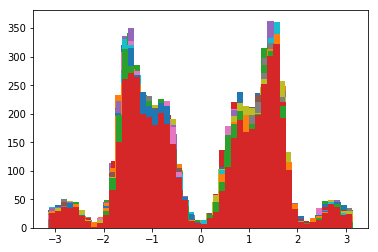

In [19]:
dist = [ 0 for i in range(len(dihRESULT))]
distSUM = [ 0 for i in range(50)]
for i in range(len(dihRESULT)):
    dist[i] =  plt.hist(dihRESULT[i], bins=50)
    distSUM = np.add(distSUM,dist[i][0])
    #print(dist[i][0])
    #print(distSUM)

[ 2775.  3392.  4320.  4717.  3944.  2455.  1254.   664.  1263.  4166.
 12181. 27051. 41073. 43143. 35230. 28754. 26178. 26294. 26419. 24717.
 19284. 11687.  5388.  2254.   905.  1028.  2288.  5676. 11571. 18816.
 24278. 26097. 25216. 25577. 28488. 35477. 43770. 42596. 27794. 13180.
  4380.  1341.   733.  1108.  2325.  3805.  4561.  4279.  3380.  2872.]
[-3.1405656, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-3.1405656, -3.0149379, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-3.1405656, -3.0149379, -2.8893101, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[-3.1405656, -3.0149379, -2.8893101, -2.7636824, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

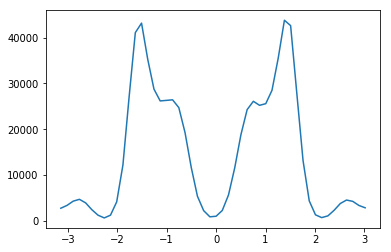

In [65]:
#totDIST=[distSUM,dist[0][1]]
#print(totDIST)
#print(dihRESULT[0])
#print(dist[0])
print(distSUM)
xaxis = [ 0 for i in range(len(dist[0][1])-1)]
for i in range(len(dist[0][1])-1):
    xaxis[i]=(dist[0][1][i])
    print(xaxis)
plt.plot(xaxis,distSUM)

In [244]:
dihs = top.select("name == P or name == C11 or name == C12 or name == N")
index = [ [] for i in range(traj.topology.n_residues)]
dihRESULT = [ [] for i in range(traj.topology.n_residues)]
for residue in traj.topology.residues:
    for i in dihs:
        if(traj.topology.atom(i).residue == residue): 
            index[residue.index].append(traj.topology.atom(i).index)
    dihRESULT[residue.index] = mdtraj.compute_dihedrals(traj,[index[residue.index]])
    print(dihRESULT[residue.index])

[[ 0.58159417]
 [ 0.5931695 ]
 [ 1.537382  ]
 ...
 [-1.1605824 ]
 [-1.4243511 ]
 [ 1.2689223 ]]
[[-0.95895666]
 [-0.9192716 ]
 [-1.8199178 ]
 ...
 [-0.8661825 ]
 [ 1.4637299 ]
 [ 1.6295754 ]]
[[-0.88294685]
 [-0.6254395 ]
 [-0.33995664]
 ...
 [-0.8445387 ]
 [ 1.3674496 ]
 [ 1.9268965 ]]
[[0.6300226]
 [0.9370828]
 [0.835179 ]
 ...
 [0.2226428]
 [0.7302359]
 [0.6675999]]
[[ 1.523393 ]
 [ 1.7538913]
 [ 1.2204121]
 ...
 [-1.6110028]
 [ 0.6618317]
 [-1.4166375]]
[[ 0.8419476]
 [ 1.2995507]
 [ 1.5003561]
 ...
 [-1.0058669]
 [-0.7876058]
 [-1.612869 ]]
[[-1.0264165 ]
 [-0.6951895 ]
 [-0.63342947]
 ...
 [ 1.6605772 ]
 [ 1.7583059 ]
 [ 1.265672  ]]
[[-0.6322948 ]
 [-0.73346883]
 [-0.54328924]
 ...
 [ 1.6917678 ]
 [ 1.2015425 ]
 [ 0.89240015]]
[[ 1.0003587]
 [ 1.79524  ]
 [-0.3643268]
 ...
 [-0.9663931]
 [ 1.475746 ]
 [ 1.4461908]]
[[-0.773718  ]
 [-1.3269864 ]
 [-0.42208573]
 ...
 [-1.6235425 ]
 [ 1.2508601 ]
 [-2.4059935 ]]
[[1.3838656 ]
 [0.91841257]
 [0.75901866]
 ...
 [1.6621598 ]
 [0.33015

ValueError: indices must be shape (Any, 4). You supplied  (1, 0)

In [131]:
mdtraj.compute_dihedrals(traj,[dihs])

ValueError: indices must be shape (Any, 4). You supplied  (1, 576)

In [54]:
top

<mdtraj.Trajectory with 1 frames, 35280 atoms, 5904 residues, and unitcells at 0x7f40ec1e00b8>